# Multilayer Perceptron Regression Model
Predicts the number of comments an article will get based on the article's topic, tone, length, hour of the day and day of the week

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load training data
train_df = pd.read_csv('../../data/regression_train.csv')

# Extract the columns you want to use as input features
columns = ['BERT_sentiment_score', 'normalised_word_count', 'pub_day', 'pub_hour', 'topic']
# Extract input features from the dataframe
x_train = np.array(train_df[columns])

y_train = np.array(train_df['n_comments'])

In [3]:
# Training and validation split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [7]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', 
                               # Number of epochs to wait for improvement
                               patience=20,  
                               verbose=1, 
                               # Restore the weights of the best epoch
                               restore_best_weights=True) 

In [5]:
# Hyperparameters
num_features = 5
dropout = 0.2

In [6]:
# Define MLP model architecture
model = Sequential()
# Input layer
model.add(Dense(128, activation='relu', input_dim=num_features))
model.add(BatchNormalization())
model.add(Dropout(dropout))
# Hidden layer
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))
# Hidden layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))
# Output layer
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/100
250/250 [==============================] - 4s 7ms/step - loss: 377269.3750 - mae: 310.3787 - val_loss: 326116.6250 - val_mae: 286.8823
Epoch 2/100
250/250 [==============================] - 1s 5ms/step - loss: 368044.8125 - mae: 306.0775 - val_loss: 325429.1875 - val_mae: 292.5466
Epoch 3/100
250/250 [==============================] - 1s 5ms/step - loss: 353370.1562 - mae: 299.0577 - val_loss: 289437.6250 - val_mae: 269.5398
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 334771.3125 - mae: 291.0420 - val_loss: 263884.0938 - val_mae: 267.0500
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 315578.4062 - mae: 283.8432 - val_loss: 286364.8438 - val_mae: 270.4046
Epoch 6/100
250/250 [==============================] - 1s 5ms/step - loss: 297089.4688 - mae: 277.0158 - val_loss: 245093.6875 - val_mae: 265.4945
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 282844.4375 - mae: 274.6254 - val_loss: 225

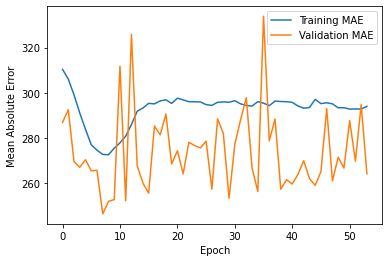

In [12]:
# plot the training and validation loss
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [8]:
# save the trained model
model.save('../../models/MLP_regression_model.h5')

In [11]:
# Evaluate the model on validation data
mse, mae = model.evaluate(x_val, y_val)
print('Validation MSE:', mse)
print('Validation MAE:', mae)

63/63 [==============================] - 0s 3ms/step - loss: 199751.5469 - mae: 266.7710
Validation MSE: 199751.546875
Validation MAE: 266.77099609375
